# MOBY PROJECT 
### Bulmaca kelimelerinden oluşan bir liste ile çeşitli denemeler.

In [138]:
# DOSYA OKU
#dosya = open("../data/words.txt")
#readline(dosya)
#close(dosya)
using Plots,Statistics,StatsPlots; gr();
#using Pkg; Pkg.add("DataStructures");
using DataStructures;

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1260


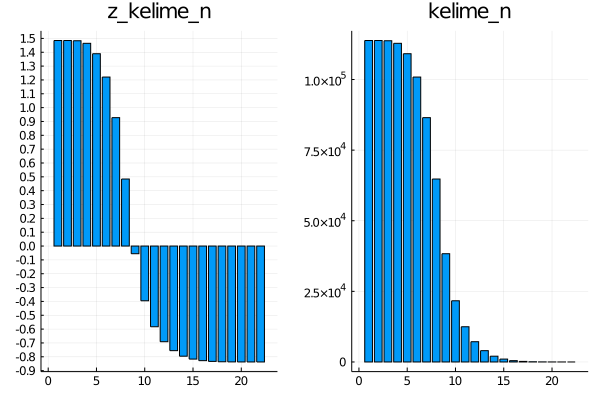

In [154]:
# >n karakterli kelimeleri al
function n_karakter(n::Int64)
    sayac=0
    for kelime in eachline("../data/words.txt")
        if(length(kelime)>=n)
            sayac+=1
        end
    end
    return sayac
end
kelime_n=[]
for i in 1:22
    push!(kelime_n,n_karakter(i))
end
z_kelime_n=(kelime_n.-mean(kelime_n))/std(kelime_n)
p1=bar(z_kelime_n,yticks=-1:0.1:2,title="z_kelime_n")
p2=bar(kelime_n,title="kelime_n")
plot(p1,p2,legend=false)

In [ ]:
# içinde e olmayan kelimeler
function e_harfi_var_mi(kelime::AbstractString)::Bool
    return occursin("e",kelime)
end
sayac=0
kelimesayac=0
for kelime in eachline("../data/words.txt")
    kelimesayac+=1
    if(!e_harfi_var_mi(kelime))
        sayac=+1
    end
end
print((sayac/kelimesayac)*100) # e harfi olmayanların yüzdesi


In [ ]:
# verilen harflerden birini içermeyen kelimeler
function bulundurmaz(kelime,harfler)
     for yasak in harfler
        if yasak in kelime
            return false
        end
    end
    return true
end
bulundurmaz("abc","fds")

### Soru 
Kelimelerden en çoğunu döndüren 5 yasak harfi bulun. 
(Kelimelerde en az kullanılan ilk 5 harf nelerdir?)

Bunun için bir barplot çizdirebliriz aslında.
Bir değişkene ingiliz alfabesini atar ve metinde geçen bütün kelimelerde olan harfleri sayabiliriz.
Her kelime için bir alfabe vektörü oluşturulur. (geçen harfler 1 geçmeyenler 0)

q => -1.1342279944173856
j => -1.1291557732988635
x => -1.0976257501296718
z => -1.061640397599616
w => -0.8976500053555051
v => -0.8753390867868706
k => -0.8690330821530322
f => -0.7544283022858833
y => -0.7284160331713002
b => -0.580190652511785
h => -0.49786987462874327
m => -0.3422417928773309
p => -0.3063249838759039
g => -0.23575942115268034
u => -0.12221706597927598
c => -0.015083530732652966
d => -0.00600151318935319
l => 0.4209903984029936
o => 0.679091055454279
t => 0.7653530862334696
n => 0.8837277601751957
r => 1.036305654902632
a => 1.1602666264275954
i => 1.4628863053232066
s => 1.7759588723346915
e => 2.468625500891793


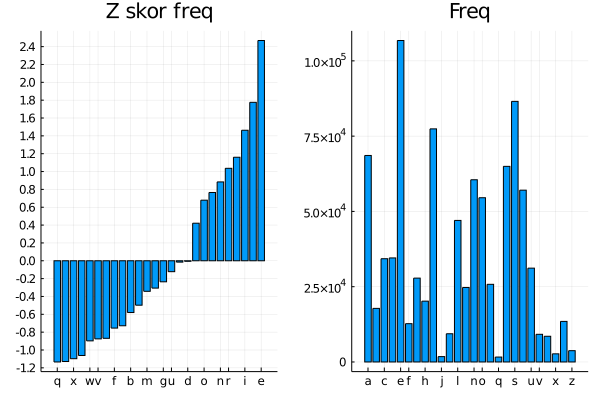

In [157]:
alfabe=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o',
    'p','q','r','s','t','u','v','w','x','y','z']
toplam_harf=zeros(Int,26)

dosya = open("../data/words.txt");
kelimeler=readlines(dosya);

for kelime in kelimeler
    toplam_harf+=count.(string.(alfabe),kelime)
end
close(dosya)
z_toplam_harf=(toplam_harf.-mean(toplam_harf))/std(toplam_harf)
sozluk=SortedDict(zip(z_toplam_harf,alfabe))

[println(k," => ",f) for (f,k) in sozluk ]
p1=bar(collect(values(sozluk)),
    collect(keys(sozluk)),
    yticks=-2.0:0.2:2.6,
    title="Z skor freq")
p2=bar(alfabe,toplam_harf,title="Freq")
plot(p1,p2,legend=false)